In [1]:
from sympy import *
from IPython.display import display, Math
init_printing()

k = symbols('k', real=True, positive=True)
T = symbols('T', real=True, positive=True)
vGP = symbols('v_{G\,P}')
xP = symbols('x_P')
vA = symbols('v_A')
vW = symbols('v_W')
kapP = symbols('\\kappa_P')
lP = symbols('\\lambda_P')

d_etadot_d_eta = -k - pi/T
d_etadot_d_beta = vGP / vA / cos(xP) * pi / T - vGP**2 * kapP * tan(xP) / vA / cos(xP)
d_betadot_d_eta = -pi / T * vA * cos(xP) / vGP
d_betadot_d_beta = pi / T - vGP * kapP * tan(xP)

display(Math('\cfrac{\\partial \\dot{\\eta}}{\\partial \\eta} = %s' %latex(d_etadot_d_eta)))
display(Math('\\cfrac{\\partial \\dot{\\eta}}{\\partial \\beta} = %s' %latex(d_etadot_d_beta)))
display(Math('\\cfrac{\\partial \\dot{\\beta}}{\\partial \\eta} = %s' %latex(d_betadot_d_eta)))
display(Math('\\cfrac{\\partial \\dot{\\beta}}{\\partial \\beta} = %s' %latex(d_betadot_d_beta)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
omW = symbols('\\omega_W')
omW_expr = vGP * kapP * tan(xP)

a = symbols('a')
a_expr = vGP / vA / cos(xP)

display(Math('%s = %s' %(latex(omW), latex(omW_expr))))
display(Math('%s = %s' %(latex(a), latex(a_expr))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

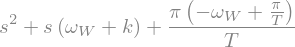

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# second order dynamical system
s = symbols('s')
sod_b = (k + omW)
sod_c = pi/T * (pi/T - omW)
second_order_dynamics = s**2 + sod_b * s + sod_c
display(second_order_dynamics)

# natural frequency
omn = symbols('\\omega_n')
omn_expr = sqrt(sod_c)
display(Math('%s = %s' %(latex(omn), latex(omn_expr))))

# damping ratio
zeta = symbols('\\zeta')
zeta_expr = simplify(sod_b / 2 / omn_expr)
display(Math('%s = %s' %(latex(zeta), latex(zeta_expr))))

In [4]:
# nominal gains (zero wind case)

om0 = symbols('\\omega_0', positive = True, real = True)
zeta0 = symbols('\\zeta_0', positive = True, real = True)

k0 = symbols('k_0', positive = True, real = True)
k0_expr = 2 * zeta0 * om0
display(Math('%s = %s' %(latex(k0),latex(k0_expr))))

T0 = symbols('T_0', positive = True, real = True)
T0_expr = pi / om0
display(Math('%s = %s' %(latex(T0),latex(T0_expr))))

# plug in and confirm it works when wind freq = 0
display(Math('%s(%s=%s,%s=%s,%s=0) = %s = %s' %(latex(omn),latex(k),latex(k0), \
                                                latex(T),latex(T0),latex(omW), \
                                                latex(omn_expr.subs({omW:0, k:k0, T:T0})), \
                                                latex(omn_expr.subs({omW:0, k:k0_expr, T:T0_expr})))))
display(Math('%s(%s=%s,%s=%s,%s=0) = %s = %s' %(latex(zeta),latex(k),latex(k0), \
                                                latex(T),latex(T0),latex(omW), \
                                                latex(zeta_expr.subs({omW:0, k:k0, T:T0})), \
                                                latex(zeta_expr.subs({omW:0, k:k0_expr, T:T0_expr})))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
display(Math('%s = %s' %(latex(omn),latex(omn_expr.subs({k:k0_expr, T:T0_expr})))))
display(Math('%s = %s' %(latex(zeta),latex(zeta_expr.subs({k:k0_expr, T:T0_expr})))))

P = symbols('P')
P0 = symbols('P_0', real=True, positive=True)
P_expr = 2*pi/omn_expr.subs({k:k0_expr,T:T0_expr})
P_expr = simplify(P_expr.subs(om0, 2*pi/P0))
display(Math('%s = %s' %(latex(P),latex(P_expr))))

eig_p_expr = omn * (-zeta + I * sqrt(1 - zeta**2))
eig_n_expr = omn * (-zeta - I * sqrt(1 - zeta**2))

display(Math('s_1 = %s' %latex(eig_p_expr)))
display(Math('s_2 = %s' %latex(eig_n_expr)))


s1_simp = simplify(eig_p_expr.subs({omn:omn_expr.subs({k:k0_expr, T:T0_expr}),zeta:zeta_expr.subs({k:k0_expr, T:T0_expr})}))
s1_simp = simplify(s1_simp.subs(om0,2*pi/P0))
s2_simp = simplify(eig_n_expr.subs({omn:omn_expr.subs({k:k0_expr, T:T0_expr}),zeta:zeta_expr.subs({k:k0_expr, T:T0_expr})}))
s2_simp = simplify(s2_simp.subs(om0,2*pi/P0))

display(Math('s_1 = %s' %latex(s1_simp)))
display(Math('s_2 = %s' %latex(s2_simp)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
alpW = symbols('\\alpha_W')

fW = symbols('f_W')
fW_expr = alpA**2 * sin(lP) * cos(lP) / sqrt(1 - alpW**2 * sin(lP)**2) + alpW * sin(lP)
display(Math('%s = %s' %(latex(fW),latex(fW_expr))))

omW_expr = vA * kapP * fW
display(Math('%s = %s = %s' %(latex(omW),latex(omW_expr),latex(omW_expr.subs(fW,fW_expr)))))

# P_expr_sub = P_expr.subs(omW, omW_expr)
# display(Math('%s = %s' %(latex(P),latex(P_expr_sub))))

display(Math('%s = %s' %(latex(P),latex(P_expr))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [93]:
import numpy as np

len_lP = 201
len_alpW = 11

lP_data = np.linspace(-np.pi,np.pi,len_lP)
alpW_data = np.linspace(0,1,len_alpW)

fW_data = np.zeros([len_alpW, len_lP])
omW_data = np.zeros([len_alpW, len_lP])
P_data = np.zeros([len_alpW, len_lP])

vA1 = 10
kapP1 = 1/50
P1 = 10

fW_eval = lambdify((lP, alpW), fW_expr, 'numpy')
omW_eval = lambdify((vA, kapP, fW), omW_expr, 'numpy')
P_eval = lambdify((omW, P0), P_expr, 'numpy')

for i in range(len_alpW):
    if alpW_data[i] == 1:
        eps_pi_2 = 0.0001
        
        idx_sel_geq_pi_2 = lP_data >= np.pi/2 - eps_pi_2
        fW_data[i, idx_sel_geq_pi_2] = np.nan
        
        idx_sel_leq_m_pi_2 = lP_data <= -np.pi/2 + eps_pi_2
        fW_data[i, idx_sel_leq_m_pi_2] = np.nan
        
        idx_sel = np.all([~idx_sel_geq_pi_2, ~idx_sel_leq_m_pi_2],axis=0)
        fW_data[i, idx_sel] = fW_eval(lP_data[idx_sel], alpW_data[i])
    else:
        fW_data[i,:] = fW_eval(lP_data, alpW_data[i])
        
    omW_data[i,:] = omW_eval(vA1, kapP1, fW_data[i,:])
    P_data[i,:] = P_eval(omW_data[i,:], P1)

# print(P_data[-1,:])
print(fW_data[-1,:])

[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan -1.99901312e+00
 -1.99605346e+00 -1.99112393e+00 -1.98422940e+00 -1.97537668e+00
 -1.96457450e+00 -1.95183352e+00 -1.93716632e+00 -1.92058737e+00
 -1.90211303e+00 -1.88176

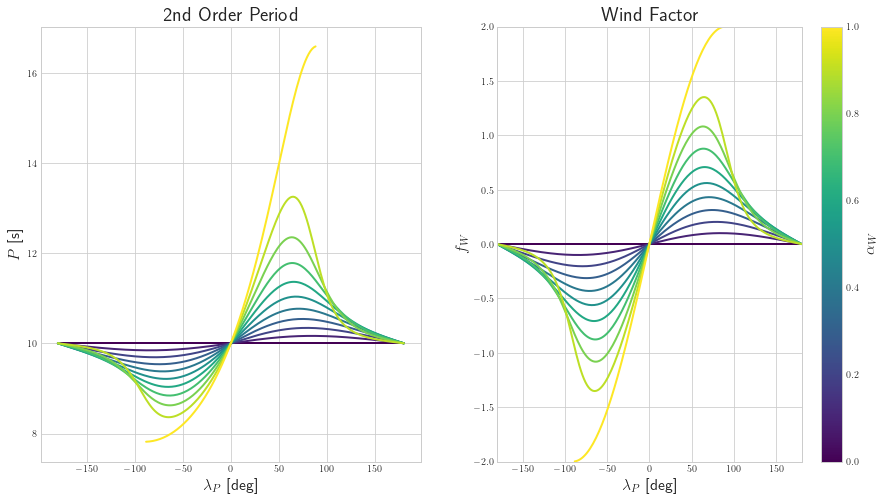

In [107]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({"text.usetex": True})
plt.rcParams.update({'legend.frameon': True,
                     'legend.framealpha': 1,
                     'legend.facecolor': 'white',
                     'axes.titlesize': 20,
                     'axes.labelsize': 16,
                     'legend.fontsize': 14})
plot_lw = 2
cmap = plt.cm.get_cmap('viridis', len_alpW)

fig = plt.figure(figsize=(15,8))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])

ax1.set_title(r'2nd Order Period')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$P$ [s]')
for i in range(len_alpW):
    ax1.plot(np.rad2deg(lP_data), P_data[i,:], linewidth=plot_lw, color=cmap(i))

ax2.set_title(r'Wind Factor')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$f_W$')
for i in range(len_alpW):
    ax2.plot(np.rad2deg(lP_data), fW_data[i,:], linewidth=plot_lw, color=cmap(i))
ax2.set_xlim(np.rad2deg([lP_data[0], lP_data[-1]]))
ax2.set_ylim([-2, 2])

# plot dummy data to have stand alone colorbar
dummy_array = np.array([[0,1]])
dummy_plot = ax2.imshow(dummy_array, cmap='viridis')
dummy_plot.set_visible(False)
fig.colorbar(dummy_plot, ax=ax2, label=r'$\alpha_W$')

ax2.set_aspect('auto')
    
plt.show()